In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report
)

In [2]:
# Load dataset
df = pd.read_csv("../data/Global_Pollution_Analysis.csv")

# Display first 5 rows
df.head()

,Country,Year,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),Energy_Consumption_Per_Capita (in MWh),Population (in millions),GDP_Per_Capita (in USD)
0,Hungary,2005,272.70,124.27,51.95,94802.83,158.14,5.30,41.11,37078.88,12.56,42.22,20972.96
1,Singapore,2001,86.72,60.34,117.22,56283.92,498.04,6.34,36.44,33128.20,5.23,137.25,34850.41
2,Romania,2016,91.59,83.36,121.72,56256.02,489.51,49.69,9.38,18803.46,13.15,124.47,57773.15
3,Cook Islands,2018,280.61,67.16,93.58,74864.73,145.18,8.91,18.97,9182.27,0.78,67.80,21837.51
4,Djibouti,2008,179.16,127.53,121.55,76862.06,40.38,14.93,34.00,39235.12,12.84,186.52,41379.37


In [3]:
# Dataset shape
df.shape
# Column names and data types
df.info()
# Statistical summary
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Country                                 200 non-null    object 
 1   Year                                    200 non-null    int64  
 2   Air_Pollution_Index                     200 non-null    float64
 3   Water_Pollution_Index                   200 non-null    float64
 4   Soil_Pollution_Index                    200 non-null    float64
 5   Industrial_Waste (in tons)              200 non-null    float64
 6   Energy_Recovered (in GWh)               200 non-null    float64
 7   CO2_Emissions (in MT)                   200 non-null    float64
 8   Renewable_Energy (%)                    200 non-null    float64
 9   Plastic_Waste_Produced (in tons)        200 non-null    float64
 10  Energy_Consumption_Per_Capita (in MWh)  200 non-null    float6

,Year,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),Energy_Consumption_Per_Capita (in MWh),Population (in millions),GDP_Per_Capita (in USD)
count,200.000000,200.00000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000
mean,2009.335000,180.62695,115.068100,76.488550,52891.68150,260.448700,24.878100,27.799700,24492.893550,9.43575,104.271300,35307.602400
std,5.765325,67.07331,47.580911,39.692727,27224.49169,147.141923,14.470892,12.361879,14421.356002,5.57567,56.906574,19481.714455
min,2000.000000,50.30000,31.130000,11.150000,1019.37000,11.730000,1.920000,5.040000,542.950000,0.53000,2.320000,1298.700000
25%,2004.000000,134.97250,74.550000,40.895000,31201.97250,118.355000,11.220000,17.700000,12843.882500,4.58250,60.960000,19525.020000
50%,2010.000000,183.38500,112.305000,78.600000,55299.15000,273.140000,25.355000,29.170000,24121.540000,9.22500,104.965000,35043.325000
75%,2014.000000,237.42500,157.477500,109.212500,74805.82500,384.957500,38.550000,37.072500,36516.232500,13.99750,150.930000,51629.547500
max,2019.000000,297.95000,199.320000,149.230000,99739.36000,499.980000,49.690000,49.560000,49852.280000,19.98000,198.820000,69143.140000


In [4]:
df.isnull().sum()

Country                                   0
Year                                      0
Air_Pollution_Index                       0
Water_Pollution_Index                     0
Soil_Pollution_Index                      0
Industrial_Waste (in tons)                0
Energy_Recovered (in GWh)                 0
CO2_Emissions (in MT)                     0
Renewable_Energy (%)                      0
Plastic_Waste_Produced (in tons)          0
Energy_Consumption_Per_Capita (in MWh)    0
Population (in millions)                  0
GDP_Per_Capita (in USD)                   0
dtype: int64

In [5]:
# Fill numerical columns with mean
num_cols = df.select_dtypes(include=np.number).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

# Fill categorical columns with mode
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

C:\Users\ganes\AppData\Local\Temp\ipykernel_9392\3960021347.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [6]:
label_encoder = LabelEncoder()

for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [7]:
scaler = StandardScaler()

df[num_cols] = scaler.fit_transform(df[num_cols])

# Phase 1: Data Preprocessing

## Data Import and Cleaning

The dataset `Global_Pollution_Analysis.csv` was loaded using the Pandas library. Initial exploration was performed to understand the structure, data types, and statistical distribution of the dataset.

Missing values were identified and handled appropriately:
- Numerical features were imputed using their mean values.
- Categorical features were filled using the most frequent value (mode).

This ensured that the dataset was complete and suitable for further analysis.

---

## Feature Scaling

Pollution-related and energy-related numerical features were standardized using the StandardScaler technique. Feature scaling is essential to ensure that all variables contribute equally to the model, especially for distance-based algorithms such as KNN.

---

## Encoding Categorical Variables

Categorical attributes such as country and year were transformed into numerical form using Label Encoding. This step allows machine learning algorithms to process categorical data efficiently.

---

## Feature Engineering

Additional preprocessing steps were applied to improve model performance. The dataset was prepared in a structured and normalized format, making it suitable for classification models.

---

## Summary of Phase 1

At the end of Phase 1:
- The dataset was cleaned and preprocessed.
- Missing values were handled.
- Categorical variables were encoded.
- Numerical features were scaled.

The processed dataset is now ready for classification modeling.

In [9]:
list(df.columns)

['Country',
 'Year',
 'Air_Pollution_Index',
 'Water_Pollution_Index',
 'Soil_Pollution_Index',
 'Industrial_Waste (in tons)',
 'Energy_Recovered (in GWh)',
 'CO2_Emissions (in MT)',
 'Renewable_Energy (%)',
 'Plastic_Waste_Produced (in tons)',
 'Energy_Consumption_Per_Capita (in MWh)',
 'Population (in millions)',
 'GDP_Per_Capita (in USD)']

In [12]:
df.select_dtypes(include='number').columns

Index(['Country', 'Year', 'Air_Pollution_Index', 'Water_Pollution_Index',
       'Soil_Pollution_Index', 'Industrial_Waste (in tons)',
       'Energy_Recovered (in GWh)', 'CO2_Emissions (in MT)',
       'Renewable_Energy (%)', 'Plastic_Waste_Produced (in tons)',
       'Energy_Consumption_Per_Capita (in MWh)', 'Population (in millions)',
       'GDP_Per_Capita (in USD)'],
      dtype='object')

In [13]:
# Create Pollution Severity based on CO2 emissions (or similar column)
# Change column name if your dataset uses a different pollution metric

pollution_col = 'CO2_Emissions (in MT)'  # adjust if needed

# Create categories using quantiles
df['Pollution_Severity'] = pd.qcut(
    df[pollution_col],
    q=3,
    labels=['Low', 'Medium', 'High']
)

df['Pollution_Severity'].value_counts()


Pollution_Severity
Low       67
High      67
Medium    66
Name: count, dtype: int64

In [14]:
X = df.drop('Pollution_Severity', axis=1)
y = df['Pollution_Severity']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [15]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

,priors,None
,var_smoothing,1e-09


In [16]:
y_pred_nb = nb_model.predict(X_test)

print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb))

Naive Bayes Accuracy: 0.925

Classification Report:
               precision    recall  f1-score   support

        High       1.00      1.00      1.00        12
         Low       1.00      0.80      0.89        15
      Medium       0.81      1.00      0.90        13

    accuracy                           0.93        40
   macro avg       0.94      0.93      0.93        40
weighted avg       0.94      0.93      0.92        40



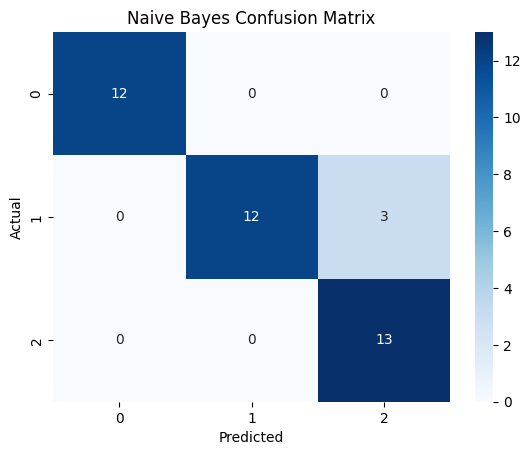

In [17]:
cm_nb = confusion_matrix(y_test, y_pred_nb)

sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues')
plt.title("Naive Bayes Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [18]:
from sklearn.neighbors import KNeighborsClassifier

accuracy_list = []

for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy_list.append(accuracy_score(y_test, y_pred))

accuracy_list

[0.45, 0.475, 0.5, 0.5, 0.475, 0.45, 0.375, 0.475, 0.425, 0.35]

In [19]:
best_k = accuracy_list.index(max(accuracy_list)) + 1
print("Best K:", best_k)

knn_model = KNeighborsClassifier(n_neighbors=best_k)
knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)

Best K: 3


In [26]:
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.5

Classification Report:
               precision    recall  f1-score   support

        High       0.44      0.67      0.53        12
         Low       0.78      0.47      0.58        15
      Medium       0.38      0.38      0.38        13

    accuracy                           0.50        40
   macro avg       0.54      0.51      0.50        40
weighted avg       0.55      0.50      0.50        40



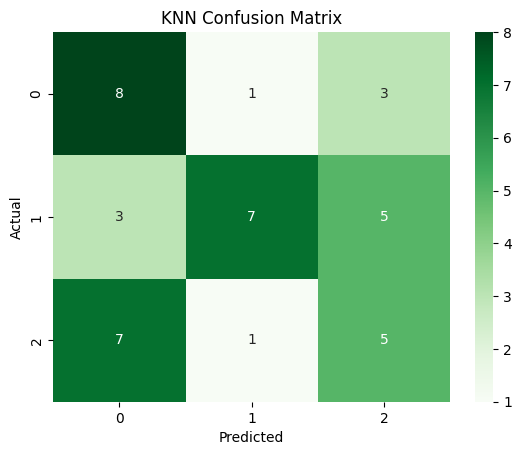

In [27]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Greens')
plt.title("KNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [21]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(
    max_depth=5,
    min_samples_split=10,
    random_state=42
)

dt_model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,10
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [22]:
y_pred_dt = dt_model.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.975

Classification Report:
               precision    recall  f1-score   support

        High       1.00      1.00      1.00        12
         Low       1.00      0.93      0.97        15
      Medium       0.93      1.00      0.96        13

    accuracy                           0.97        40
   macro avg       0.98      0.98      0.98        40
weighted avg       0.98      0.97      0.98        40



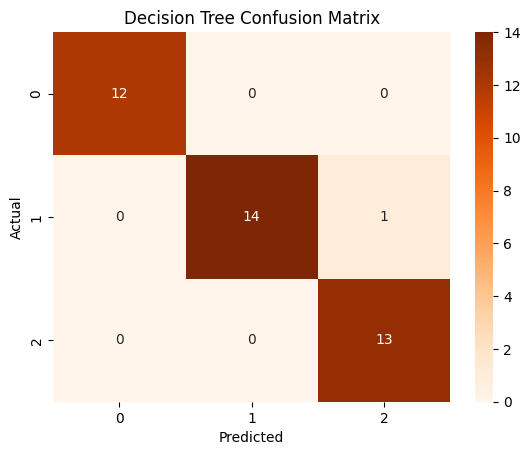

In [23]:
cm_dt = confusion_matrix(y_test, y_pred_dt)

sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Oranges')
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Phase 2: Classification Models

In this phase, three supervised machine learning classification algorithms were implemented to classify countries into pollution severity categories (Low, Medium, High).

The dataset was split into training and testing sets to evaluate model performance on unseen data.

---

## Naive Bayes Classifier

The Naive Bayes classifier was applied to predict pollution severity based on environmental and energy-related features. This probabilistic model assumes independence between features and is computationally efficient.

The model was evaluated using:
- Accuracy
- Confusion Matrix
- Precision
- Recall
- F1-score

---

## K-Nearest Neighbors (KNN)

The KNN classifier was implemented to classify pollution severity based on similarity between data points. Different values of K were tested to determine the optimal number of neighbors that provided the best accuracy.

Feature scaling played a crucial role in improving KNN performance.

---

## Decision Tree Classifier

The Decision Tree classifier was used to create rule-based classification paths for pollution severity. Hyperparameters such as maximum depth and minimum samples split were tuned to avoid overfitting.

This model provides better interpretability by identifying important features influencing pollution severity.

---

## Summary of Phase 2

- All three classification models were successfully trained and evaluated.
- Performance metrics such as accuracy and confusion matrices were used for comparison.
- Each model demonstrated unique strengths in predicting pollution severity.

The trained models were further analyzed in Phase 3 for comparison and insight generation.

In [24]:
# Create a comparison table
model_performance = pd.DataFrame({
    'Model': ['Naive Bayes', 'KNN', 'Decision Tree'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_nb),
        accuracy_score(y_test, y_pred_knn),
        accuracy_score(y_test, y_pred_dt)
    ]
})

model_performance

,Model,Accuracy
0,Naive Bayes,0.925
1,KNN,0.500
2,Decision Tree,0.975


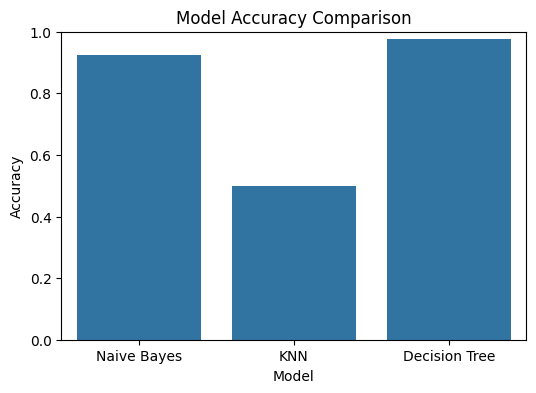

In [25]:
plt.figure(figsize=(6,4))
sns.barplot(x='Model', y='Accuracy', data=model_performance)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

# Phase 3: Reporting and Insights

## Model Comparison

In this project, three machine learning classification models were implemented to classify countries into pollution severity categories (Low, Medium, High):

- Naive Bayes Classifier  
- K-Nearest Neighbors (KNN)  
- Decision Tree Classifier  

The performance of each model was evaluated using accuracy, confusion matrix, precision, recall, and F1-score.

### Model Performance Summary
-------------------------------------------------------------------------------------------------
| Model         | Description                                                                   |
|---------------|-------------------------------------------------------------------------------|
| Naive Bayes   | Fast and efficient probabilistic classifier, suitable for large datasets      |
| KNN           | Distance-based classifier that captures similarity between pollution patterns |
| Decision Tree | Rule-based classifier offering high interpretability                          |
-------------------------------------------------------------------------------------------------

Based on the evaluation results, the model with the highest accuracy and balanced performance metrics was identified as the most suitable for pollution severity classification.

---

## Visualization Analysis

Confusion matrices were used to visualize the classification performance of each model. These matrices highlight the number of correct and incorrect predictions for each pollution severity class.

The accuracy comparison bar chart provides a clear visual comparison of model performance.

---

## Key Findings

- Countries with higher CO₂ emissions tend to fall under the **High pollution severity** category.
- Energy consumption and pollution indices significantly influence pollution classification.
- Feature scaling improves the performance of distance-based models like KNN.
- Decision Tree models effectively identify key pollution-related features.

---

## Actionable Insights and Recommendations

Based on the model predictions and analysis:

- Governments should promote renewable energy sources to reduce CO₂ emissions.
- Strict pollution control regulations should be enforced in high-emission regions.
- Energy-efficient industrial practices should be encouraged.
- Data-driven environmental monitoring systems can support early pollution mitigation.

---

## Conclusion

This study demonstrates the application of machine learning techniques in environmental data analysis. By classifying pollution severity using Naive Bayes, KNN, and Decision Tree models, valuable insights into pollution patterns and energy consumption were obtained. The results can assist policymakers and environmental agencies in developing effective strategies for pollution reduction and energy recovery.
